In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from k_means import KMeans

In [2]:
data = pd.read_csv('/ML/ML_Classic_Algorithms/LogisticRegression/data/Iris.csv')
iris_type = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
x_axis = 'PetalLengthCm'
y_axis = 'PetalWidthCm'

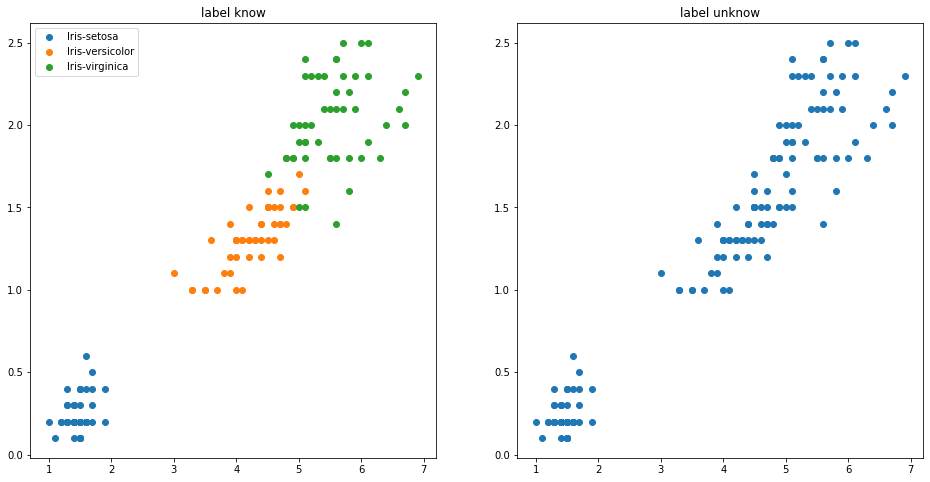

In [3]:
plt.figure(figsize=(16,8))
plt.subplot(121)
for type in iris_type:
    plt.scatter(data[x_axis][data['Species']==type], data[y_axis][data['Species']==type], label=type)
plt.title('label know')
plt.legend()

plt.subplot(122)
plt.scatter(data[x_axis][:], data[y_axis][:])
plt.title('label unknow')
plt.show()

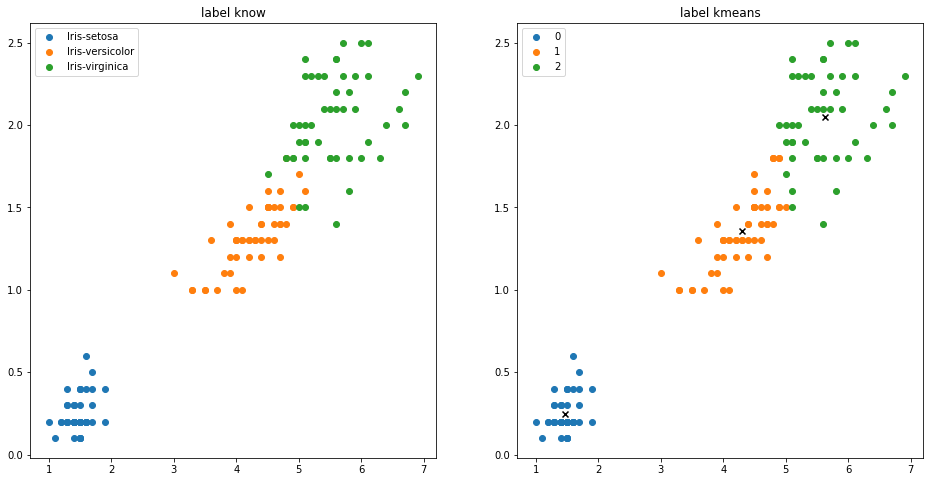

In [28]:
num_examples = data.shape[0]
x_train = data[[x_axis, y_axis]].values.reshape(num_examples, 2)

# 指定训练参数
num_k = 3 
max_iterations = 50

k_means = KMeans(x_train, num_k)
centers, closest_center_ids = k_means.train(max_iterations)
# 对比结果
plt.figure(figsize=(16,8))
plt.subplot(121)
for type in iris_type:
    plt.scatter(data[x_axis][data['Species']==type], data[y_axis][data['Species']==type], label=type)
plt.title('label know')
plt.legend()

plt.subplot(122)
for center_id, center in enumerate(centers):
    current_examples_index = (closest_center_ids == center_id).flatten()
    plt.scatter(data[x_axis][current_examples_index], data[y_axis][current_examples_index], label=center_id)

for center_id, center in enumerate(centers):
    plt.scatter(center[0], center[1], c='black', marker='x')
plt.title('label kmeans')
plt.legend()
plt.show()